In [51]:
# Consider an American neighbourhood of N = 50 residents. Each resident
# identifies as democratic (D) or republican (R).
# The following four events can happen (with rates):

# A democratic randomly becomes republican, rate = 0.1D
# A republican randomly becomes democratic, rate = 0.1R
# A republican convinces a democratic to become republican, rate = 0.01DR
# A democratic convinces a republican to become democratic. rate = 0.01RD

# a
# Explain what the rates mean. Why are the ‘convincing‘ rates
# proportional to D · R?

# rate = 0.1D:
# For each democrat, there is a 0.1 probability they switch to being a republican at each time increment.

# rate = 0.1R: 
# For each republican, there is a 0.1 probability they switch to being a democrat at each time increment.

# rate = 0.01DR
# The rate represents the probability that a republican convinces a democrat to become republican at each time increment.

# rate = 0.01RD
# The rate represents the probability that a democrat convinces a republican to become a democrat at each time increment.

# Because of the fact, that the rates are proportional to D * R,
# the more interactions there are between the two groups,
# the more opportunities there are for persuasion.


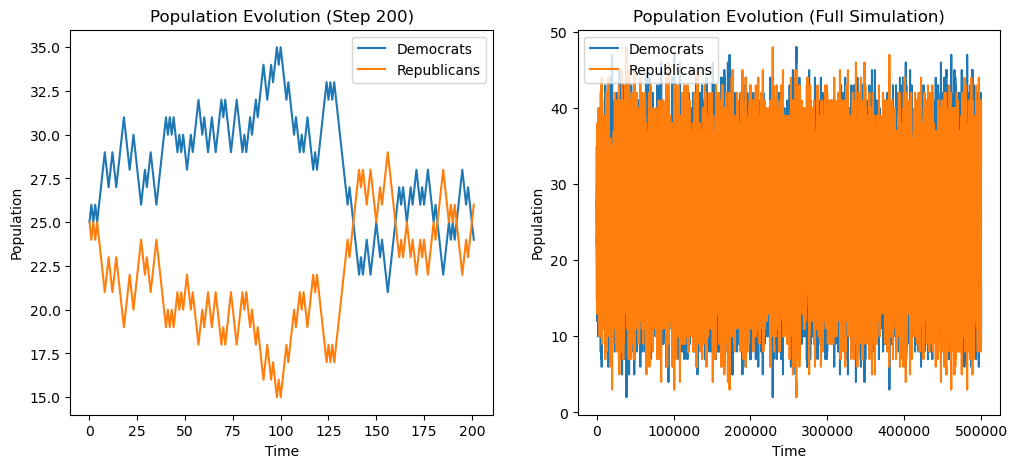

In [52]:
# b
# Initialize a system with D = 25 and R = 25 and simulate the above
# rate system using the Gillespie method for 500,000 steps.

import random
import matplotlib.pyplot as plt

D = 25
R = 25
steps = 500000
time = 0
D_data = [D]
R_data = [R]

# figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for step in range(steps):
    total_rate = 0.1 * D + 0.1 * R + 0.01 * D * R + 0.01 * R * D
    time_increment = random.expovariate(total_rate)
    
    # random numbers for event selection
    event_choice = random.uniform(0, total_rate)
    
    if event_choice < 0.1 * D:
        D -= 1
        R += 1
    elif event_choice < 0.1 * D + 0.1 * R:
        D += 1
        R -= 1
    elif event_choice < 0.1 * D + 0.1 * R + 0.01 * D * R:
        D -= 1
        R += 1
    else:
        D += 1
        R -= 1
    
    time += time_increment
    D_data.append(D)
    R_data.append(R)

    if step == 200:
        axs[0].plot(D_data, label='Democrats')
        axs[0].plot(R_data, label='Republicans')
        axs[0].set_xlabel('Time')
        axs[0].set_ylabel('Population')
        axs[0].set_title('Population Evolution (Step 200)')
        axs[0].legend()

# c
# Plot D and R as a function of time and discuss the result.
axs[1].plot(D_data, label='Democrats')
axs[1].plot(R_data, label='Republicans')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Population')
axs[1].set_title('Population Evolution (Full Simulation)')
axs[1].legend()


plt.show()


# As all rates have an equal counterpart, the amount of democrats and republicans 
# will keep being pretty much evenly distributed,
# although there are some fluctuations.

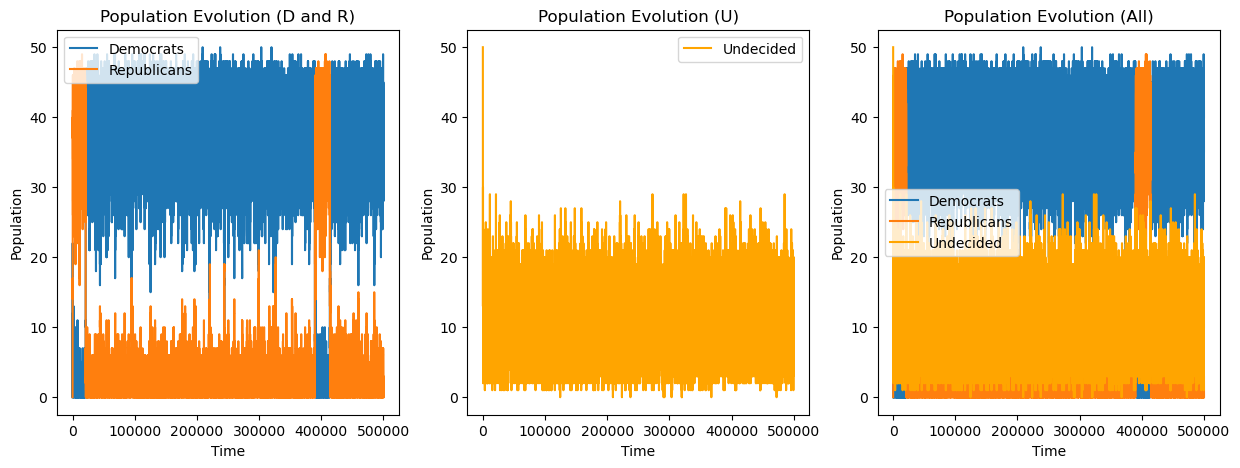

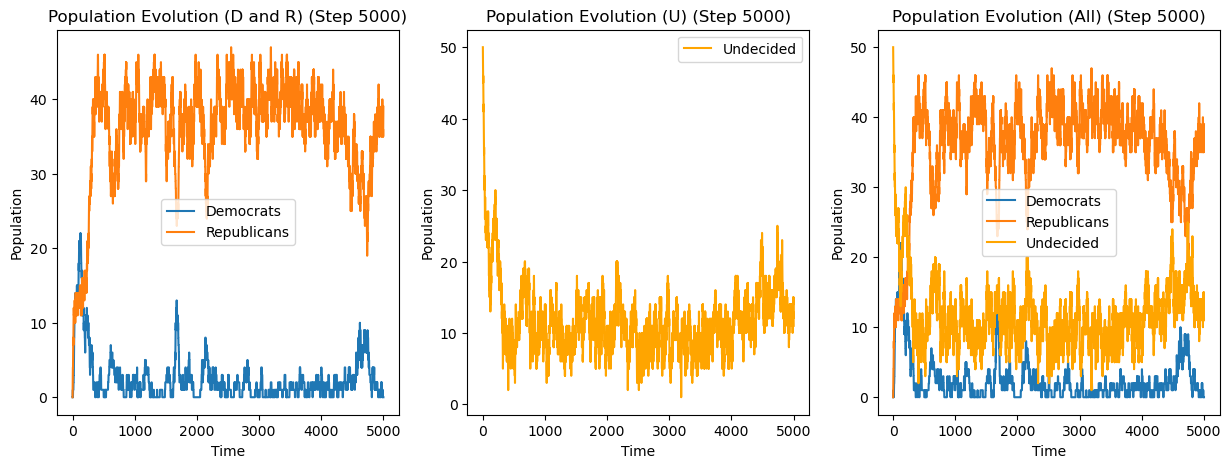

In [53]:
# We now introduce a third type of resident: undecided (U). The rules
# are then updated such that when someone is convinced to leave their
# party, they become undecided, and thus needs to be convinced twice to be
# converted to the other party. The random rates are thus

# A democratic randomly becomes undecided, rate = 0.1D
# A republican randomly becomes undecided, rate = 0.1R
# An undecided randomly becomes democratic, rate = 0.05U
# An undecided randomly becomes republican, rate = 0.05U

# and the convincing rates

# A republican convinces a democratic to become undecided, rate = 0.01DR
# A republican convinces an undecided to become republican, rate = 0.01UR
# A democratic convinces a republican to become undecided, rate = 0.01RD
# A democratic convinces an undecided to become democratic. rate = 0.01UD


# Initialize a system with R = 0, U = 50 and D = 0 and simulate the
# above rate system using the Gillespie method for 500,000 steps

# d


import random
import matplotlib.pyplot as plt

D = 0
R = 0
U = 50
steps = 500000
time = 0
D_data = [D]
R_data = [R]
U_data = [U]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

fig1, axs1 = plt.subplots(1, 3, figsize=(15, 5))

for step in range(steps):
    total_rate = 0.1 * D + 0.1 * R + 0.05 * U + 0.05 * U + 0.01 * D * R + 0.01 * U * R + 0.01 * R * D + 0.01 * U * D
    time_increment = random.expovariate(total_rate)
    
    event_choice = random.uniform(0, total_rate)
    
    if event_choice < 0.1 * D:
        D -= 1
        U += 1
    elif event_choice < 0.1 * D + 0.1 * R:
        R -= 1
        U += 1
    elif event_choice < 0.1 * D + 0.1 * R + 0.05 * U:
        U -= 1
        D += 1
    elif event_choice < 0.1 * D + 0.1 * R + 0.05 * U + 0.05 * U:
        U -= 1
        R += 1
    elif event_choice < 0.1 * D + 0.1 * R + 0.05 * U + 0.05 * U + 0.01 * D * R:
        D -= 1
        U += 1
    elif event_choice < 0.1 * D + 0.1 * R + 0.05 * U + 0.05 * U + 0.01 * D * R + 0.01 * U * R:
        U -= 1
        R += 1
    elif event_choice < 0.1 * D + 0.1 * R + 0.05 * U + 0.05 * U + 0.01 * D * R + 0.01 * U * R + 0.01 * R * D:
        R -= 1
        U += 1
    else:
        U -= 1
        D += 1
    
    time += time_increment
    D_data.append(D)
    R_data.append(R)
    U_data.append(U)

    if step == 5000:
        axs1[0].plot(D_data, label='Democrats')
        axs1[0].plot(R_data, label='Republicans')
        axs1[0].set_xlabel('Time')
        axs1[0].set_ylabel('Population')
        axs1[0].set_title('Population Evolution (D and R) (Step 5000)')
        axs1[0].legend()

        axs1[1].plot(U_data, label='Undecided', color='orange')
        axs1[1].set_xlabel('Time')
        axs1[1].set_ylabel('Population')
        axs1[1].set_title('Population Evolution (U) (Step 5000)')
        axs1[1].legend()

        axs1[2].plot(D_data, label='Democrats')
        axs1[2].plot(R_data, label='Republicans')
        axs1[2].plot(U_data, label='Undecided', color='orange')
        axs1[2].set_xlabel('Time')
        axs1[2].set_ylabel('Population')
        axs1[2].set_title('Population Evolution (All) (Step 5000)')
        axs1[2].legend()

axs[0].plot(D_data, label='Democrats')
axs[0].plot(R_data, label='Republicans')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Population')
axs[0].set_title('Population Evolution (D and R)')
axs[0].legend()

axs[1].plot(U_data, label='Undecided', color='orange')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Population')
axs[1].set_title('Population Evolution (U)')
axs[1].legend()

axs[2].plot(D_data, label='Democrats')
axs[2].plot(R_data, label='Republicans')
axs[2].plot(U_data, label='Undecided', color='orange')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Population')
axs[2].set_title('Population Evolution (All)')
axs[2].legend()

# Plot R and D as a function of time and discuss the result
# e

plt.show()

# The undecided quickly gets an affiliation with either the democrats or the republicans.
# But then at some point the amount of undecided residents becomes almost non-changing.
# The population switches between being greatly dominated by either republicans or democrats,
# altough there still is a substantial amount of undecided residents (approximately half the poulation).
